In [1]:
import os
import sys
sys.path.append('..')

import json
import time
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.retrieval.retrieval import Retriever

In [2]:
sns.set_theme()

In [3]:
def RR(source, retrieved_sources):
    if source not in retrieved_sources:
        return 0
    else:
        return 1 / (retrieved_sources.index(source) + 1)

In [15]:
df = pd.read_csv('../asset/dataset/testdata_with_source.csv')
df

,question,answer,knowledges,prompt,source
0,ตามพระราชบัญญัติขายตรงและตลาดแบบตรง พ.ศ. 2545 ...,สินค้า' หมายความว่า สิ่งของที่ผลิตหรือมีไว้เพื...,พระราชบัญญัติขายตรงและตลาดแบบตรง พ.ศ. 2545\n\n...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติขายตรงและตลาดแบบตรง/พระราชบัญญัติ...
1,หากลูกหนี้ไม่ได้กำหนดเวลาชำระหนี้ไว้ ลูกหนี้สา...,ลูกหนี้สามารถชำระหนี้ได้โดยพลัน,ประมวลกฎหมายแพ่งและพาณิชย์ - บรรพ 2 (หนี้) - ล...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,ประมวลกฎหมายแพ่งและพาณิชย์/ประมวลกฎหมายแพ่งและ...
2,เครื่องหมายการค้าที่จดทะเบียนไว้ตามกฎหมายเดิมจ...,เครื่องหมายการค้าที่จดทะเบียนไว้ตามพระราชบัญญั...,พระราชบัญญัติเครื่องหมายการค้า (ฉบับที่ 3) พ.ศ...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติเครื่องหมายการค้า/พระราชบัญญัติเค...
3,หากลูกหนี้ได้ชำระหนี้สินเต็มจำนวนแล้ว ศาลมีอำน...,ศาลมีอำนาจสั่งยกเลิกการล้มละลายหากหนี้สินของบุ...,พระราชบัญญัติล้มละลาย (ฉบับที่ 10) พ.ศ. 2561 -...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติล้มละลาย/พระราชบัญญัติล้มละลาย_หม...
4,บัตรอิเล็กทรอนิกส์ตามนิยามในประมวลกฎหมายอาญาหม...,บัตรอิเล็กทรอนิกส์หมายถึงเอกสารหรือวัตถุอื่นใด...,ประมวลกฎหมายอาญา - ภาค 1 (บทบัญญัติทัว่ไป) - ล...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,ประมวลกฎหมายอาญา/ประมวลกฎหมายอาญา_ภาค1_ลักษณะ1...
...,...,...,...,...,...
408,สถานศึกษา สถานฝึกและอบรม และสถานแนะนำทางจิตที่...,จะเป็นสถานศึกษา สถานฝึกและอบรม และสถานแนะนำทาง...,พระราชบัญญัติศาลเยาวชนและครอบครัวและวิธีพิจารณ...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติศาลเยาวชนและครอบครัวและวิธีพิจารณ...
409,หากผู้ทำแผนไม่สามารถมาประชุมได้เพราะเหตุผลพิเศ...,หากผู้ทำแผนไม่สามารถมาประชุมได้เพราะเหตุผลพิเศ...,พระราชบัญญัติล้มละลาย (ฉบับที่ 10) พ.ศ. 2561 -...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติล้มละลาย/พระราชบัญญัติล้มละลาย_หม...
410,หากบุคคลใดกรอกข้อมูลเท็จลงในแบบสำรวจ จะต้องรับ...,บุคคลดังกล่าวจะต้องระวางโทษจำคุกไม่เกินหกเดือน...,พระราชบัญญัติประกันสังคม พ.ศ. 2533 (ฉบับปรับปร...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติประกันสังคม/พระราชบัญญัติประกันสั...
411,กรรมการค่าจ้างมีวาระการดำรงตำแหน่งกี่ปี?,กรรมการค่าจ้างมีวาระการดำรงตำแหน่งคราวละสองปี,พระราชบัญญัติคุ้มครองแรงงาน (ฉบับที่ 8) พ.ศ. 2...,<s><|im_start|>system\nคุณคือนักกฎหมายที่จะตอบ...,พระราชบัญญัติคุ้มครองแรงงาน/พระราชบัญญัติคุ้มค...


In [6]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large'
)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:211: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device': device_type})


----------using 4*GPUs----------


In [16]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=20)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

100%|██████████| 413/413 [01:59<00:00,  3.46it/s]


In [8]:
retriever.documents[-1].metadata

{'source': '/home/shanwibo/Capstone-TamTanai/asset/documentation/ประมวลกฎหมายอาญา/ประมวลกฎหมายอาญา_ภาค2_ลักษณะ7_หมวด1.txt',
 'law_numbers': ['240',
  '241',
  '242',
  '243',
  '244',
  '245',
  '246',
  '247',
  '248',
  '249'],
 'law_name': 'ประมวลกฎหมายอาญา',
 'category': 'general'}

In [9]:
for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

Top 1 accuracy: 0.8015
Top 2 accuracy: 0.8765
Top 3 accuracy: 0.9080
Top 4 accuracy: 0.9177
Top 5 accuracy: 0.9274
Top 6 accuracy: 0.9346
Top 7 accuracy: 0.9346
Top 8 accuracy: 0.9492
Top 9 accuracy: 0.9516
Top 10 accuracy: 0.9564
Top 11 accuracy: 0.9564
Top 12 accuracy: 0.9613
Top 13 accuracy: 0.9613
Top 14 accuracy: 0.9661
Top 15 accuracy: 0.9661
Top 16 accuracy: 0.9685
Top 17 accuracy: 0.9709
Top 18 accuracy: 0.9734
Top 19 accuracy: 0.9734
Top 20 accuracy: 0.9758


In [10]:
rr_scores = []
for result in results:
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
print(f'MRR: {np.mean(rr_scores)}')

MRR: 0.8589124632904009


In [70]:
min_score = np.min([score for score in rr_scores if score > 0.1])
print(min_score)
idx = rr_scores.index(min_score)
results[idx]

0.14285714285714285


{'question': 'คู่ความต้องยื่นบัญชีระบุพยานก่อนวันสืบพยานกี่วัน?',
 'source': 'ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค1_ลักษณะ5_หมวด1.txt',
 'retrieved_sources': ['ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค2_ลักษณะ2_หมวด4_ส่วน3.txt',
  'ประมวลกฎหมายวิธีพิจารณาความอาญา/ประมวลกฎหมายวิธีพิจารณาความอาญา_ภาค5_หมวด1.txt',
  'ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค1_ลักษณะ5_หมวด2.txt',
  'พระราชบัญญัติว่าด้วยราคาสินค้าและบริการ/พระราชบัญญัติว่าด้วยราคาสินค้าและบริการ_หมวด2.txt',
  'ประมวลกฎหมายวิธีพิจารณาความอาญา/ประมวลกฎหมายวิธีพิจารณาความอาญา_ภาค5_หมวด2.txt',
  'ประมวลกฎหมายวิธีพิจารณาความอาญา/ประมวลกฎหมายวิธีพิจารณาความอาญา_ภาค3_ลักษณะ2.txt',
  'ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค1_ลักษณะ5_หมวด1.txt',
  'ประมวลรัษฎากร/ประมวลรัษฎากร_ลักษณะ2_หมวด2_ส่วน1.txt',
  'ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค2_ลักษณะ2_หมวด2_ส่วน1.txt',
  'พระราชบัญญัติการแข่งขัน

In [71]:
for r in results[idx]['retrieved_sources']:
    print(r)

ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค2_ลักษณะ2_หมวด4_ส่วน3.txt
ประมวลกฎหมายวิธีพิจารณาความอาญา/ประมวลกฎหมายวิธีพิจารณาความอาญา_ภาค5_หมวด1.txt
ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค1_ลักษณะ5_หมวด2.txt
พระราชบัญญัติว่าด้วยราคาสินค้าและบริการ/พระราชบัญญัติว่าด้วยราคาสินค้าและบริการ_หมวด2.txt
ประมวลกฎหมายวิธีพิจารณาความอาญา/ประมวลกฎหมายวิธีพิจารณาความอาญา_ภาค5_หมวด2.txt
ประมวลกฎหมายวิธีพิจารณาความอาญา/ประมวลกฎหมายวิธีพิจารณาความอาญา_ภาค3_ลักษณะ2.txt
ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค1_ลักษณะ5_หมวด1.txt
ประมวลรัษฎากร/ประมวลรัษฎากร_ลักษณะ2_หมวด2_ส่วน1.txt
ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค2_ลักษณะ2_หมวด2_ส่วน1.txt
พระราชบัญญัติการแข่งขันทางการค้า/พระราชบัญญัติการแข่งขันทางการค้า_หมวด2.txt
พระราชบัญญัติป้องกันและปราบปรามการฟอกเงิน พ.ศ. ๒๕๔๒/หมวด 2.txt
ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ประมวลกฎหมายวิธีพิจารณาความแพ่ง_ภาค1_ลักษณะ2_หมวด2.txt
ประมวลกฎหมายวิธีพิจารณาความแพ่ง/ป

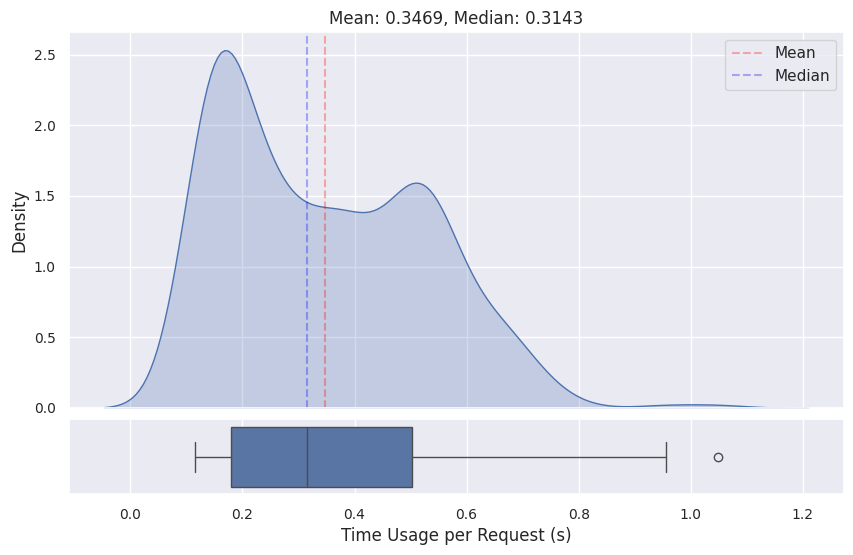

In [51]:
times = [result['time'] for result in results]
mean = np.mean(times)
median = np.median(times)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [5, 1]})

sns.kdeplot(times, ax=ax1, fill=True)
ax1.axvline(x=mean, color='red', linestyle='--', alpha=0.3, label='Mean')
ax1.axvline(x=median, color='blue', linestyle='--', alpha=0.3, label='Median')
ax1.set_title(f'Mean: {mean:.4f}, Median: {median:.4f}')
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend()

sns.boxplot(x=times, ax=ax2, showfliers=True)
ax2.set_xlabel('Time Usage per Request (s)')
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

plt.subplots_adjust(hspace=0.05)
plt.show()

# Compare Embedding model

## multilingual-e5-large

In [39]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    persist_directory=None
)

----------using 4*GPUs----------


In [40]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

100%|██████████| 413/413 [00:06<00:00, 60.61it/s]

Recall: 0.9709443099273608
MRR: 0.7049827656274293
Time: 0.016343756391696145 sec
Average Retrieval Size: 36.7772397094431


## multilingual-e5-large-instruct

In [30]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large-instruct',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    persist_directory=None
)

----------using 4*GPUs----------


In [32]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

100%|██████████| 413/413 [00:06<00:00, 61.11it/s]

Recall: 0.937046004842615
MRR: 0.67058834582097
Time: 0.016214934734686236 sec
Average Retrieval Size: 32.0


## multilingual-e5-base

In [35]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-base',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    persist_directory=None
)

----------using 4*GPUs----------


In [36]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

100%|██████████| 413/413 [00:03<00:00, 107.08it/s]

Recall: 0.9564164648910412
MRR: 0.6333810027465213
Time: 0.009226780538120224 sec
Average Retrieval Size: 37.847457627118644


## multilingual-e5-small

In [37]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-small',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    persist_directory=None
)

----------using 4*GPUs----------


In [38]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

100%|██████████| 413/413 [00:03<00:00, 128.78it/s]

Recall: 0.9539951573849879
MRR: 0.6352264925002397
Time: 0.0076775654753530286 sec
Average Retrieval Size: 37.40677966101695


# Compare Embedding model (only MRR)

## multilingual-e5-large

In [6]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=1000,
    persist_directory=None
)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:211: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device': device_type})


----------using 4*GPUs----------


In [7]:
results = retriever.context_search('ขับรถชนคน')
len(results)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:312: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  retrieved_documents = retriever.get_relevant_documents(query)


751

In [31]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

rr_scores = []
times = []
for result in results:
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')

100%|██████████| 413/413 [00:06<00:00, 65.38it/s]

MRR: 0.7078512163349887
Time: 0.015179688358999627 sec


## multilingual-e5-large-instruct

In [32]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large-instruct',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=1000,
    persist_directory=None
)

----------using 4*GPUs----------


In [33]:
results = retriever.context_search('ขับรถชนคน')
len(results)

751

In [34]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

rr_scores = []
times = []
for result in results:
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')

100%|██████████| 413/413 [00:06<00:00, 63.24it/s]

MRR: 0.6719160706026428
Time: 0.01569217804269121 sec


## multilingual-e5-base

In [35]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-base',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=1000,
    persist_directory=None
)

----------using 4*GPUs----------


In [36]:
results = retriever.context_search('ขับรถชนคน')
len(results)

751

In [37]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

rr_scores = []
times = []
for result in results:
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')

100%|██████████| 413/413 [00:04<00:00, 102.74it/s]

MRR: 0.6345223117681285
Time: 0.009640055187677934 sec


## multilingual-e5-small

In [38]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-small',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=1000,
    persist_directory=None
)

----------using 4*GPUs----------


In [39]:
results = retriever.context_search('ขับรถชนคน')
len(results)

751

In [40]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

rr_scores = []
times = []
for result in results:
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')

100%|██████████| 413/413 [00:03<00:00, 104.03it/s]

MRR: 0.6348013480604477
Time: 0.00949470586984556 sec


# Tune Parameter

## K

In [9]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=1000,
    persist_directory=None
)

----------using 4*GPUs----------


In [10]:
results = retriever.context_search('ขับรถชนคน')
len(results)

751

In [44]:
retrieval_results = []
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    # sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    # sources = [source for source in sources if 'law' not in source]
    retrieved_documents = [doc for doc in retrieved_documents if 'law' not in doc.metadata['source']]
    retrieval_results.append({
        'question': row['question'],
        'source': row['source'],
        # 'retrieved_sources': sources,
        'retrieved_documents': retrieved_documents,
        'time': time.time() - start
    })

100%|██████████| 413/413 [00:06<00:00, 62.17it/s]


In [45]:
for k in range(5, 101, 5):
    print(f'k = {k}')
    results = []
    for result in tqdm(retrieval_results):
        start = time.time()
        reranked_documents, reranking_scores = retriever.rerank(result['question'], result['retrieved_documents'][:k], n=k)
        results.append({
            'question': result['question'],
            'source': result['source'],
            'retrieved_sources': ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in reranked_documents],
            'reranking_scores': reranking_scores,
            'time': time.time() - start
        })
    with open(f'result/context_search_k={k}.json', 'w') as file:
        json.dump(results, file, indent=4, ensure_ascii=False)

k = 5


100%|██████████| 413/413 [00:27<00:00, 14.80it/s]


k = 10


100%|██████████| 413/413 [00:38<00:00, 10.76it/s]


k = 15


100%|██████████| 413/413 [00:39<00:00, 10.55it/s]


k = 20


100%|██████████| 413/413 [00:40<00:00, 10.14it/s]


k = 25


100%|██████████| 413/413 [00:42<00:00,  9.81it/s]


k = 30


100%|██████████| 413/413 [00:41<00:00,  9.85it/s]


k = 35


100%|██████████| 413/413 [00:43<00:00,  9.51it/s]


k = 40


100%|██████████| 413/413 [00:43<00:00,  9.43it/s]


k = 45


100%|██████████| 413/413 [00:45<00:00,  9.14it/s]


k = 50


100%|██████████| 413/413 [00:45<00:00,  9.01it/s]


k = 55


100%|██████████| 413/413 [00:46<00:00,  8.92it/s]


k = 60


100%|██████████| 413/413 [00:47<00:00,  8.65it/s]


k = 65


100%|██████████| 413/413 [00:49<00:00,  8.41it/s]


k = 70


100%|██████████| 413/413 [00:49<00:00,  8.27it/s]


k = 75


100%|██████████| 413/413 [00:51<00:00,  8.06it/s]


k = 80


100%|██████████| 413/413 [00:52<00:00,  7.89it/s]


k = 85


100%|██████████| 413/413 [00:55<00:00,  7.43it/s]


k = 90


100%|██████████| 413/413 [00:57<00:00,  7.20it/s]


k = 95


100%|██████████| 413/413 [00:59<00:00,  6.97it/s]


k = 100


100%|██████████| 413/413 [01:02<00:00,  6.64it/s]


In [4]:
ks = list(range(5, 101, 5))

In [5]:
context_results_dict = {}
for k in ks:
    with open(f'result/context_search_k={k}.json') as file:
        context_results_dict[k] = json.load(file)

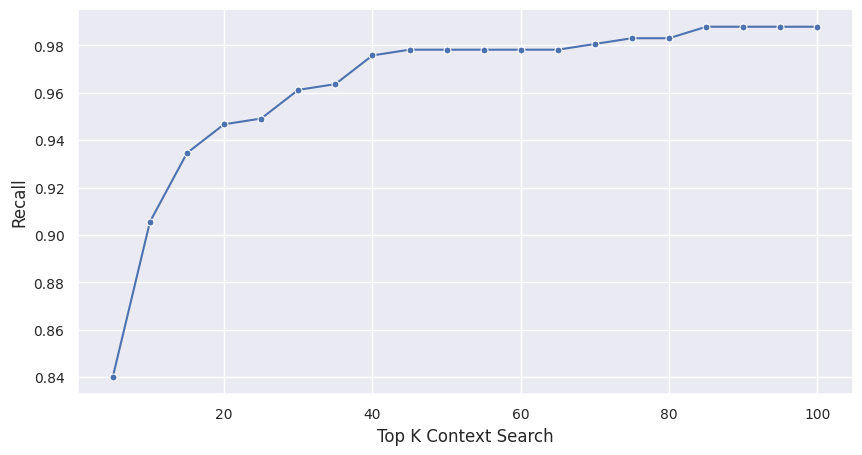

In [6]:
recalls = []
for k in context_results_dict:
    results = context_results_dict[k]
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'])
    recalls.append((sum(hits) / len(hits)))

plt.figure(figsize=(10, 5))
sns.lineplot(x=ks, y=recalls, marker='o', markersize=5)
plt.xlabel('Top K Context Search')
plt.ylabel('Recall')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
for k, recall in zip(ks, recalls):
    print(k, recall)

5 0.8401937046004843
10 0.9055690072639225
15 0.9346246973365617
20 0.9467312348668281
25 0.9491525423728814
30 0.9612590799031477
35 0.9636803874092009
40 0.9757869249394673
45 0.9782082324455206
50 0.9782082324455206
55 0.9782082324455206
60 0.9782082324455206
65 0.9782082324455206
70 0.9806295399515739
75 0.9830508474576272
80 0.9830508474576272
85 0.9878934624697336
90 0.9878934624697336
95 0.9878934624697336
100 0.9878934624697336


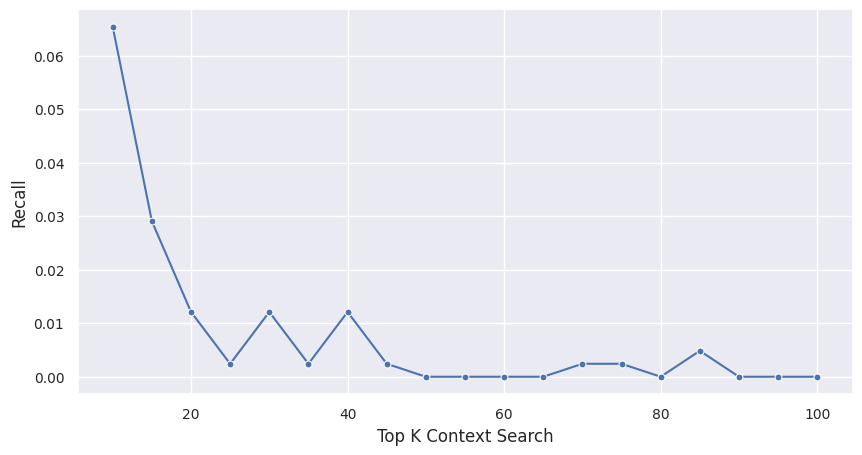

In [7]:
increasing_rates = [None]
for i in range(1, len(recalls)):
    increasing_rates.append(recalls[i] - recalls[i-1])

plt.figure(figsize=(10, 5))

sns.lineplot(x=ks, y=increasing_rates, marker='o', markersize=5)
plt.xlabel('Top K Context Search')
plt.ylabel('Recall')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

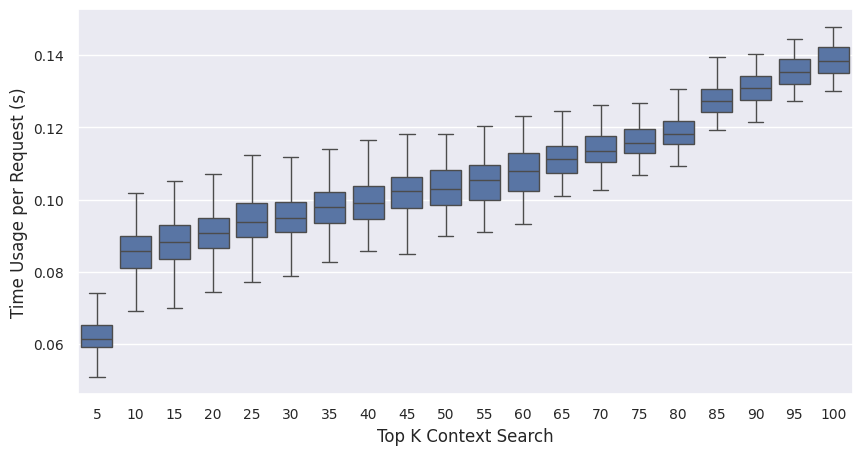

In [8]:
time_df = {
    'k': [],
    'time': []
}
for k in context_results_dict:
    results = context_results_dict[k]
    time_df['k'] += [k] * len(results)
    time_df['time'] += [result['time'] for result in results]
time_df = pd.DataFrame(time_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=time_df, x='k', y='time', showfliers=False)
plt.xlabel('Top K Context Search')
plt.ylabel('Time Usage per Request (s)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

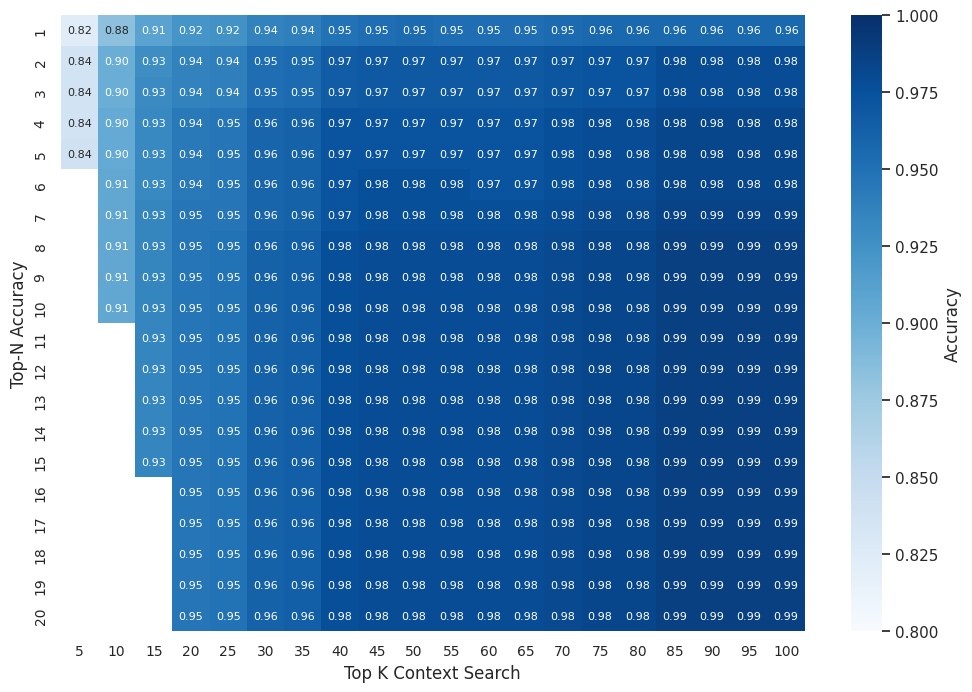

In [9]:
accuracy_df = []
for k in context_results_dict:
    results = context_results_dict[k]
    top_n_accuracy = {
        'k': k
    }
    for n in range(1, 21):
        if n > k:
            break
        hits = []
        for result in results:
            hits.append(result['source'] in result['retrieved_sources'][:n])
        top_n_accuracy[n] = sum(hits) / len(hits)
    accuracy_df.append(top_n_accuracy)
accuracy_df = pd.DataFrame(accuracy_df)

sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_df.set_index('k').T, cmap='Blues', vmin=0.8, vmax=1, annot=True,
            cbar_kws={'label': 'Accuracy'}, annot_kws={'size': 8}, fmt='.2f')
plt.xlabel('Top K Context Search')
plt.ylabel('Top-N Accuracy')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
sns.set_theme()

In [12]:
accuracy_df[['k', 1, 2, 5, 10]]

,k,1,2,5,10
0,5,0.823245,0.837772,0.840194,NaN
1,10,0.883777,0.900726,0.903148,0.905569
2,15,0.910412,0.927361,0.932203,0.934625
3,20,0.922518,0.937046,0.944310,0.946731
4,25,0.924939,0.939467,0.946731,0.949153
5,30,0.937046,0.951574,0.958838,0.961259
6,35,0.939467,0.953995,0.961259,0.963680
7,40,0.949153,0.966102,0.973366,0.975787
8,45,0.951574,0.968523,0.973366,0.978208
9,50,0.953995,0.968523,0.973366,0.978208


## Similarity Threshold

In [5]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=1000,
    persist_directory=None
)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:211: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device': device_type})


----------using 4*GPUs----------


In [8]:
similarity_thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

In [23]:
for similarity_threshold in similarity_thresholds:
    print(f'similarity_threshold = {similarity_threshold}')
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        start = time.time()
        search_results = retriever.search(row['question'], similarity_threshold=similarity_threshold, n=1000)
        retrieved_sources = []
        reranking_scores = []
        for result in search_results:
            if 'law' not in result['document'].metadata['source']:
                retrieved_sources.append('/'.join(result['document'].metadata['source'].split('/')[-2:]))
                reranking_scores.append(result['reranking_score'])
        results.append({
            'question': row['question'],
            'source': row['source'],
            'retrieved_sources': retrieved_sources,
            'reranking_scores': reranking_scores,
            'time': time.time() - start
        })
    with open(f'result/context_search_similarity_threshold={similarity_threshold}.json', 'w') as file:
        json.dump(results, file, indent=4, ensure_ascii=False)

similarity_threshold = 0.3


100%|██████████| 413/413 [04:27<00:00,  1.54it/s]


similarity_threshold = 0.35


100%|██████████| 413/413 [04:26<00:00,  1.55it/s]


similarity_threshold = 0.39999999999999997


100%|██████████| 413/413 [04:26<00:00,  1.55it/s]


similarity_threshold = 0.44999999999999996


100%|██████████| 413/413 [04:23<00:00,  1.56it/s]


similarity_threshold = 0.49999999999999994


100%|██████████| 413/413 [04:02<00:00,  1.71it/s]


similarity_threshold = 0.5499999999999999


100%|██████████| 413/413 [02:40<00:00,  2.58it/s]


similarity_threshold = 0.5999999999999999


100%|██████████| 413/413 [01:10<00:00,  5.86it/s]


similarity_threshold = 0.6499999999999999


100%|██████████| 413/413 [00:38<00:00, 10.62it/s]


similarity_threshold = 0.7


100%|██████████| 413/413 [00:19<00:00, 20.91it/s]


similarity_threshold = 0.7499999999999999


100%|██████████| 413/413 [00:08<00:00, 48.16it/s]


similarity_threshold = 0.7999999999999998


100%|██████████| 413/413 [00:06<00:00, 66.25it/s]


similarity_threshold = 0.8499999999999999


100%|██████████| 413/413 [00:06<00:00, 67.67it/s]


similarity_threshold = 0.8999999999999999


100%|██████████| 413/413 [00:06<00:00, 67.29it/s]


In [19]:
context_results_dict = {}
for similarity_threshold in similarity_thresholds:
    with open(f'result/context_search_similarity_threshold={similarity_threshold}.json') as file:
        context_results_dict[similarity_threshold] = json.load(file)

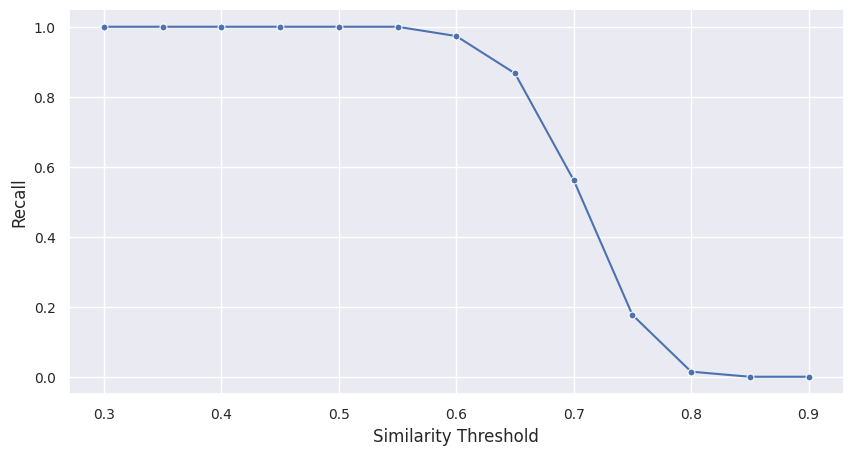

In [20]:
recalls = []
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'])
    recalls.append((sum(hits) / len(hits)))

plt.figure(figsize=(10, 5))
sns.lineplot(x=similarity_thresholds, y=recalls, marker='o', markersize=5)
plt.xlabel('Similarity Threshold')
plt.ylabel('Recall')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

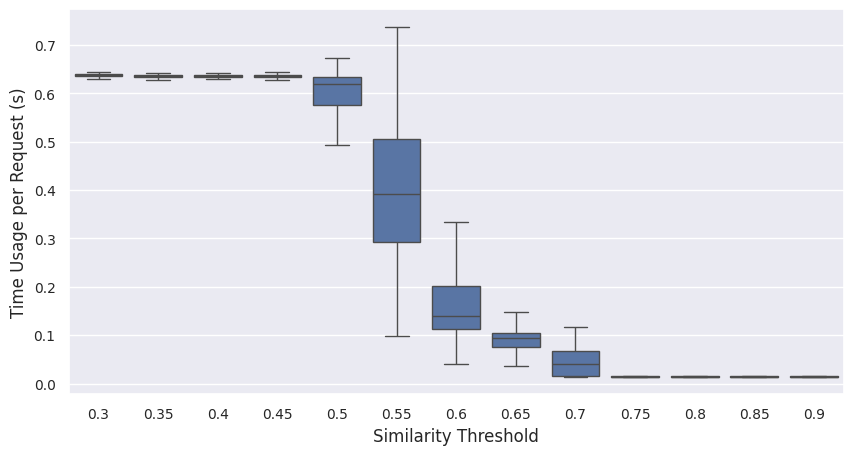

In [22]:
time_df = {
    'similarity_threshold': [],
    'time': []
}
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    time_df['similarity_threshold'] += [similarity_threshold] * len(results)
    time_df['time'] += [result['time'] for result in results]
time_df = pd.DataFrame(time_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=time_df, x='similarity_threshold', y='time', showfliers=False)
plt.xlabel('Similarity Threshold')
plt.ylabel('Time Usage per Request (s)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

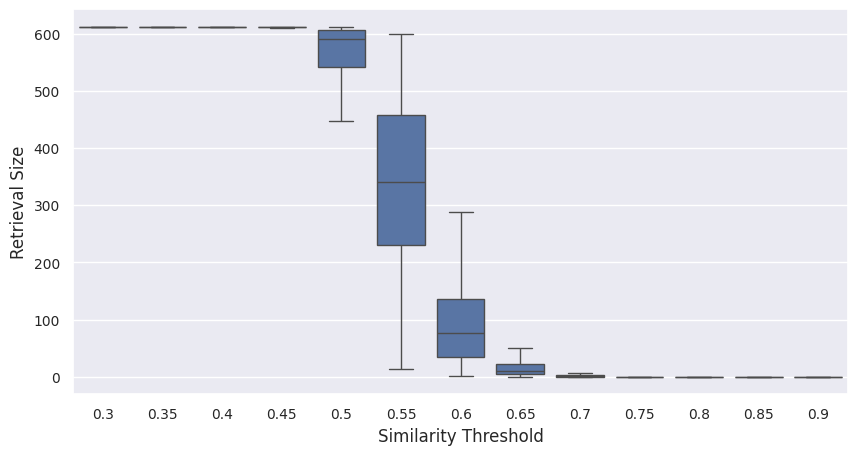

In [23]:
size_df = {
    'similarity_threshold': [],
    'size': []
}
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    size_df['similarity_threshold'] += [similarity_threshold] * len(results)
    size_df['size'] += [len(result['retrieved_sources']) for result in results]
size_df = pd.DataFrame(size_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=size_df, x='similarity_threshold', y='size', showfliers=False)
plt.xlabel('Similarity Threshold')
plt.ylabel('Retrieval Size')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

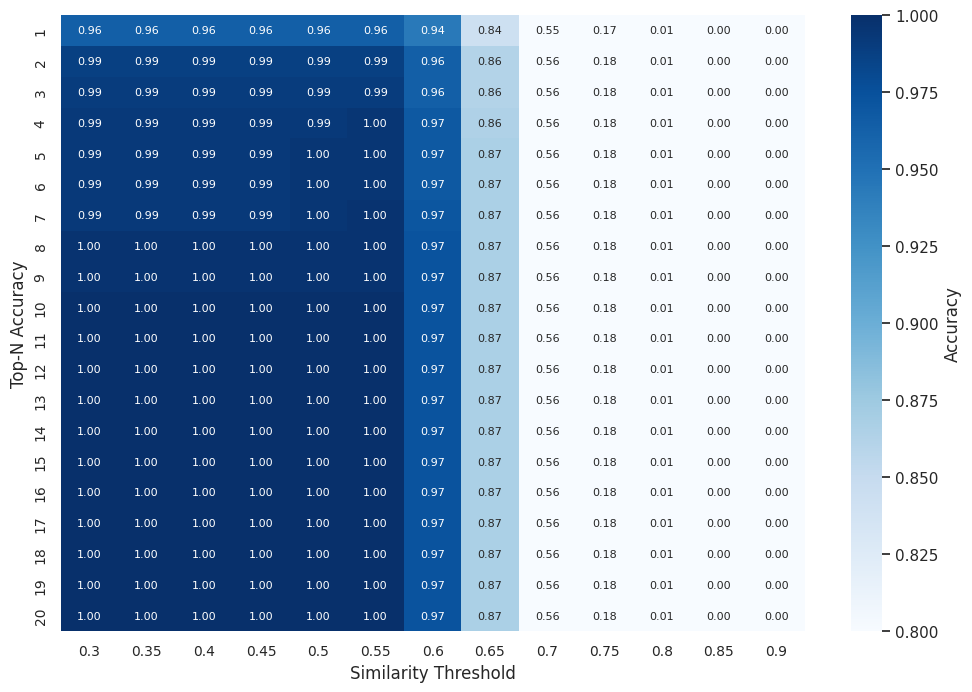

In [24]:
accuracy_df = []
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    top_n_accuracy = {
        'similarity_threshold': similarity_threshold
    }
    for n in range(1, 21):
        hits = []
        for result in results:
            hits.append(result['source'] in result['retrieved_sources'][:n])
        top_n_accuracy[n] = sum(hits) / len(hits)
    accuracy_df.append(top_n_accuracy)
accuracy_df = pd.DataFrame(accuracy_df)

sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_df.set_index('similarity_threshold').T, cmap='Blues', vmin=0.8, vmax=1, annot=True,
            cbar_kws={'label': 'Accuracy'}, annot_kws={'size': 8}, fmt='.2f')
plt.xlabel('Similarity Threshold')
plt.ylabel('Top-N Accuracy')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
sns.set_theme()

## Similarity Threshold (k = 40)

In [34]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=40,
    persist_directory=None
)

----------using 4*GPUs----------


In [35]:
results = retriever.context_search('ขับรถชนคน')
len(results)

40

In [36]:
for similarity_threshold in similarity_thresholds:
    print(f'similarity_threshold = {similarity_threshold}')
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        start = time.time()
        search_results = retriever.search(row['question'], similarity_threshold=similarity_threshold, n=40)
        retrieved_sources = []
        reranking_scores = []
        for result in search_results:
            if 'law' not in result['document'].metadata['source']:
                retrieved_sources.append('/'.join(result['document'].metadata['source'].split('/')[-2:]))
                reranking_scores.append(result['reranking_score'])
        results.append({
            'question': row['question'],
            'source': row['source'],
            'retrieved_sources': retrieved_sources,
            'reranking_scores': reranking_scores,
            'time': time.time() - start
        })
    with open(f'result/context_search_k=40_similarity_threshold={similarity_threshold}.json', 'w') as file:
        json.dump(results, file, indent=4, ensure_ascii=False)

similarity_threshold = 0.3


100%|██████████| 413/413 [00:51<00:00,  8.04it/s]


similarity_threshold = 0.35


100%|██████████| 413/413 [00:49<00:00,  8.31it/s]


similarity_threshold = 0.4


100%|██████████| 413/413 [00:49<00:00,  8.32it/s]


similarity_threshold = 0.45


100%|██████████| 413/413 [00:49<00:00,  8.34it/s]


similarity_threshold = 0.5


100%|██████████| 413/413 [00:49<00:00,  8.32it/s]


similarity_threshold = 0.55


100%|██████████| 413/413 [00:49<00:00,  8.34it/s]


similarity_threshold = 0.6


100%|██████████| 413/413 [00:48<00:00,  8.58it/s]


similarity_threshold = 0.65


100%|██████████| 413/413 [00:38<00:00, 10.80it/s]


similarity_threshold = 0.7


100%|██████████| 413/413 [00:19<00:00, 21.08it/s]


similarity_threshold = 0.75


100%|██████████| 413/413 [00:08<00:00, 48.44it/s]


similarity_threshold = 0.8


100%|██████████| 413/413 [00:06<00:00, 67.87it/s]


similarity_threshold = 0.85


100%|██████████| 413/413 [00:05<00:00, 69.00it/s]


similarity_threshold = 0.9


100%|██████████| 413/413 [00:05<00:00, 69.73it/s]


In [28]:
context_results_dict = {}
for similarity_threshold in similarity_thresholds:
    with open(f'result/context_search_k=40_similarity_threshold={similarity_threshold}.json') as file:
        context_results_dict[similarity_threshold] = json.load(file)

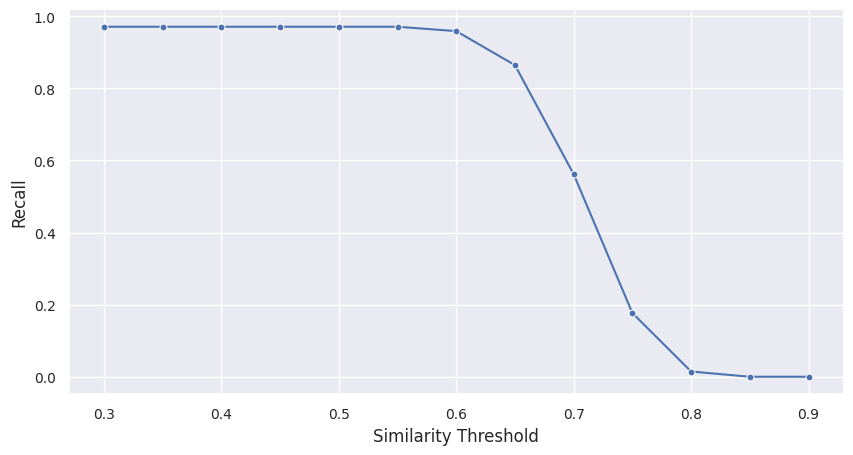

In [29]:
recalls = []
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'])
    recalls.append((sum(hits) / len(hits)))

plt.figure(figsize=(10, 5))
sns.lineplot(x=similarity_thresholds, y=recalls, marker='o', markersize=5)
plt.xlabel('Similarity Threshold')
plt.ylabel('Recall')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [30]:
for similarity_threshold, recall in zip(similarity_thresholds, recalls):
    print(similarity_threshold, recall)

0.3 0.9709443099273608
0.35 0.9709443099273608
0.4 0.9709443099273608
0.45 0.9709443099273608
0.5 0.9709443099273608
0.55 0.9709443099273608
0.6 0.9588377723970944
0.65 0.864406779661017
0.7 0.5617433414043583
0.75 0.17675544794188863
0.8 0.014527845036319613
0.85 0.0
0.9 0.0


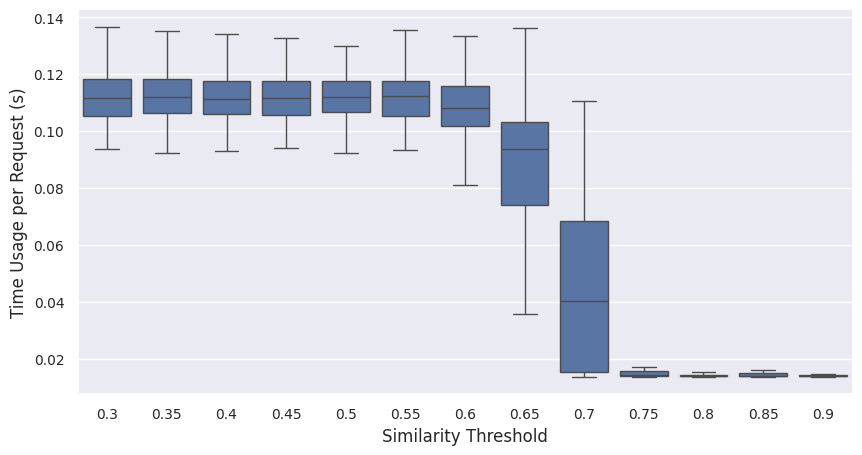

In [31]:
time_df = {
    'similarity_threshold': [],
    'time': []
}
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    time_df['similarity_threshold'] += [similarity_threshold] * len(results)
    time_df['time'] += [result['time'] for result in results]
time_df = pd.DataFrame(time_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=time_df, x='similarity_threshold', y='time', showfliers=False)
plt.xlabel('Similarity Threshold')
plt.ylabel('Time Usage per Request (s)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

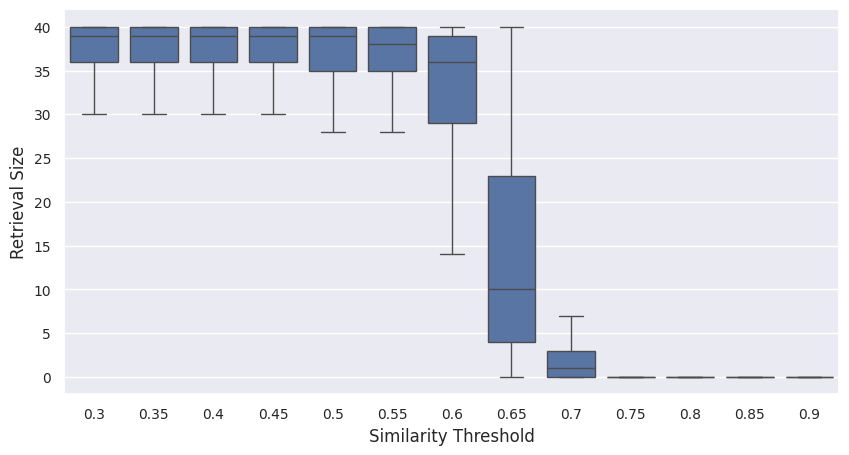

In [32]:
size_df = {
    'similarity_threshold': [],
    'size': []
}
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    size_df['similarity_threshold'] += [similarity_threshold] * len(results)
    size_df['size'] += [len(result['retrieved_sources']) for result in results]
size_df = pd.DataFrame(size_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=size_df, x='similarity_threshold', y='size', showfliers=False)
plt.xlabel('Similarity Threshold')
plt.ylabel('Retrieval Size')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

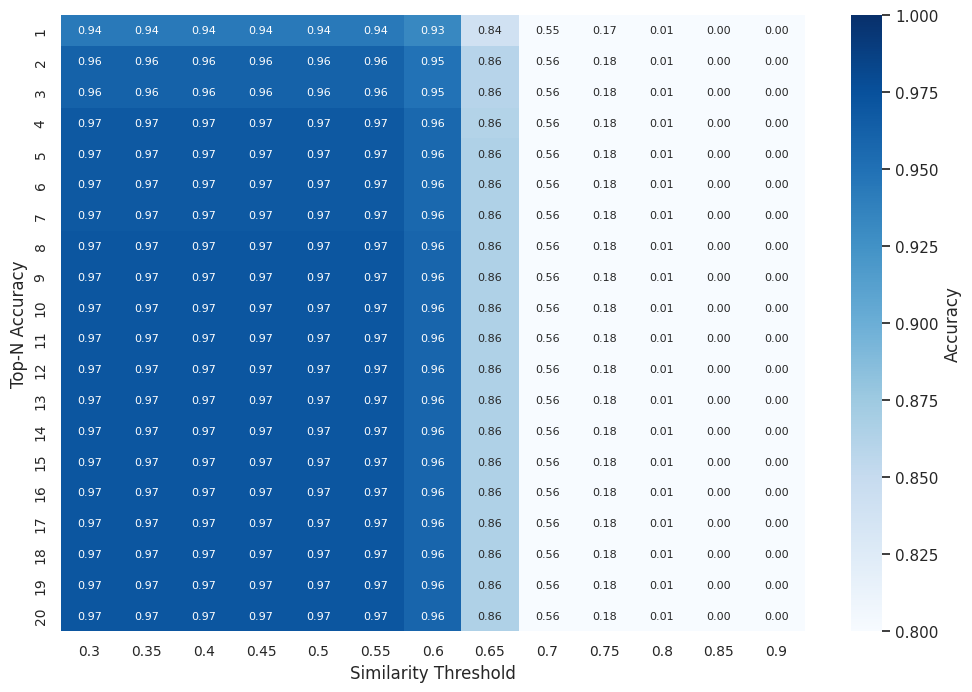

In [33]:
accuracy_df = []
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    top_n_accuracy = {
        'similarity_threshold': similarity_threshold
    }
    for n in range(1, 21):
        hits = []
        for result in results:
            hits.append(result['source'] in result['retrieved_sources'][:n])
        top_n_accuracy[n] = sum(hits) / len(hits)
    accuracy_df.append(top_n_accuracy)
accuracy_df = pd.DataFrame(accuracy_df)

sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_df.set_index('similarity_threshold').T, cmap='Blues', vmin=0.8, vmax=1, annot=True,
            cbar_kws={'label': 'Accuracy'}, annot_kws={'size': 8}, fmt='.2f')
plt.xlabel('Similarity Threshold')
plt.ylabel('Top-N Accuracy')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
sns.set_theme()

In [34]:
accuracy_df[['similarity_threshold', 1, 2, 5, 10]]

,similarity_threshold,1,2,5,10
0,0.30,0.944310,0.961259,0.968523,0.970944
1,0.35,0.944310,0.961259,0.968523,0.970944
2,0.40,0.944310,0.961259,0.968523,0.970944
3,0.45,0.944310,0.961259,0.968523,0.970944
4,0.50,0.944310,0.961259,0.968523,0.970944
5,0.55,0.944310,0.961259,0.968523,0.970944
6,0.60,0.932203,0.949153,0.956416,0.958838
7,0.65,0.840194,0.859564,0.864407,0.864407
8,0.70,0.554479,0.561743,0.561743,0.561743
9,0.75,0.174334,0.176755,0.176755,0.176755


## Similarity Threshold (k = 50)

In [5]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0, n_similar_documents=50,
    persist_directory=None
)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:211: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device': device_type})


----------using 4*GPUs----------


In [6]:
results = retriever.context_search('ขับรถชนคน')
len(results)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:313: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  retrieved_documents = retriever.get_relevant_documents(query)


50

In [9]:
for similarity_threshold in similarity_thresholds:
    print(f'similarity_threshold = {similarity_threshold}')
    results = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        start = time.time()
        search_results = retriever.search(row['question'], similarity_threshold=similarity_threshold, n=40)
        retrieved_sources = []
        reranking_scores = []
        for result in search_results:
            if 'law' not in result['document'].metadata['source']:
                retrieved_sources.append('/'.join(result['document'].metadata['source'].split('/')[-2:]))
                reranking_scores.append(result['reranking_score'])
        results.append({
            'question': row['question'],
            'source': row['source'],
            'retrieved_sources': retrieved_sources,
            'reranking_scores': reranking_scores,
            'time': time.time() - start
        })
    with open(f'result/context_search_k=50_similarity_threshold={similarity_threshold}.json', 'w') as file:
        json.dump(results, file, indent=4, ensure_ascii=False)

similarity_threshold = 0.3


100%|██████████| 413/413 [00:57<00:00,  7.20it/s]


similarity_threshold = 0.35


100%|██████████| 413/413 [00:51<00:00,  8.08it/s]


similarity_threshold = 0.4


100%|██████████| 413/413 [00:51<00:00,  8.02it/s]


similarity_threshold = 0.45


100%|██████████| 413/413 [00:51<00:00,  8.02it/s]


similarity_threshold = 0.5


100%|██████████| 413/413 [00:51<00:00,  8.07it/s]


similarity_threshold = 0.55


100%|██████████| 413/413 [00:51<00:00,  8.08it/s]


similarity_threshold = 0.6


100%|██████████| 413/413 [00:49<00:00,  8.27it/s]


similarity_threshold = 0.65


100%|██████████| 413/413 [00:36<00:00, 11.21it/s]


similarity_threshold = 0.7


100%|██████████| 413/413 [00:18<00:00, 21.79it/s]


similarity_threshold = 0.75


100%|██████████| 413/413 [00:08<00:00, 50.16it/s]


similarity_threshold = 0.8


100%|██████████| 413/413 [00:06<00:00, 67.57it/s]


similarity_threshold = 0.85


100%|██████████| 413/413 [00:05<00:00, 70.12it/s]


similarity_threshold = 0.9


100%|██████████| 413/413 [00:05<00:00, 70.14it/s]


In [10]:
context_results_dict = {}
for similarity_threshold in similarity_thresholds:
    with open(f'result/context_search_k=50_similarity_threshold={similarity_threshold}.json') as file:
        context_results_dict[similarity_threshold] = json.load(file)

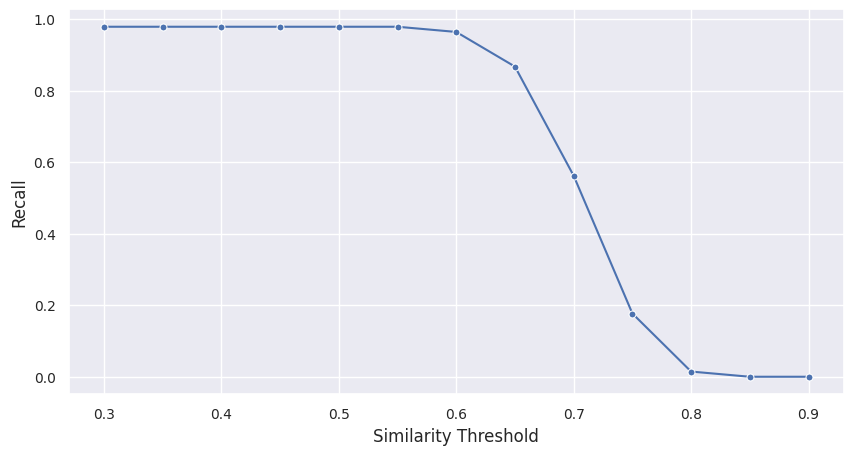

In [11]:
recalls = []
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'])
    recalls.append((sum(hits) / len(hits)))

plt.figure(figsize=(10, 5))
sns.lineplot(x=similarity_thresholds, y=recalls, marker='o', markersize=5)
plt.xlabel('Similarity Threshold')
plt.ylabel('Recall')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
for similarity_threshold, recall in zip(similarity_thresholds, recalls):
    print(similarity_threshold, recall)

0.3 0.9782082324455206
0.35 0.9782082324455206
0.4 0.9782082324455206
0.45 0.9782082324455206
0.5 0.9782082324455206
0.55 0.9782082324455206
0.6 0.9636803874092009
0.65 0.8668280871670703
0.7 0.5617433414043583
0.75 0.17675544794188863
0.8 0.014527845036319613
0.85 0.0
0.9 0.0


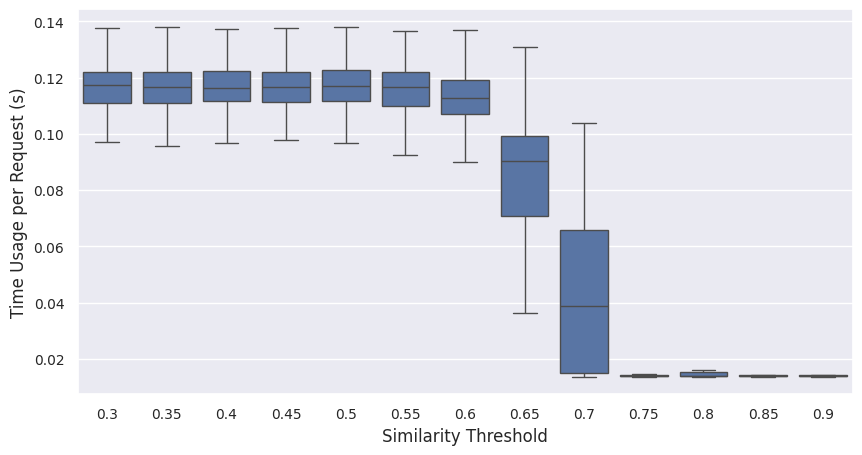

In [13]:
time_df = {
    'similarity_threshold': [],
    'time': []
}
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    time_df['similarity_threshold'] += [similarity_threshold] * len(results)
    time_df['time'] += [result['time'] for result in results]
time_df = pd.DataFrame(time_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=time_df, x='similarity_threshold', y='time', showfliers=False)
plt.xlabel('Similarity Threshold')
plt.ylabel('Time Usage per Request (s)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

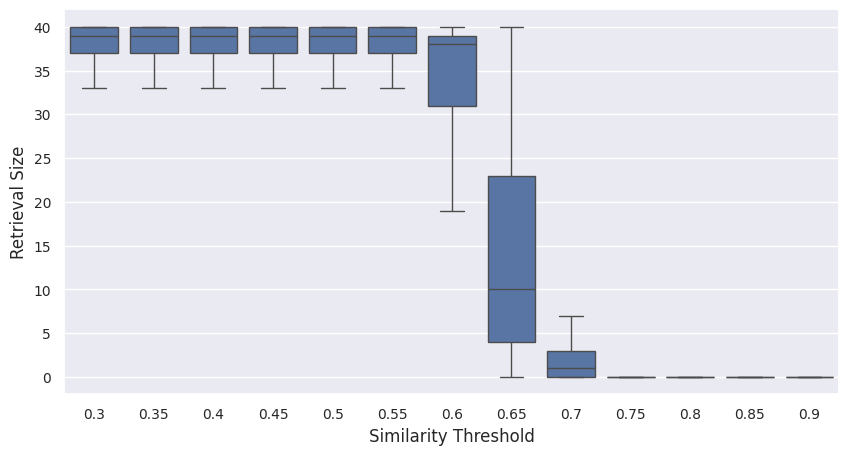

In [14]:
size_df = {
    'similarity_threshold': [],
    'size': []
}
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    size_df['similarity_threshold'] += [similarity_threshold] * len(results)
    size_df['size'] += [len(result['retrieved_sources']) for result in results]
size_df = pd.DataFrame(size_df)

plt.figure(figsize=(10, 5))
sns.boxplot(data=size_df, x='similarity_threshold', y='size', showfliers=False)
plt.xlabel('Similarity Threshold')
plt.ylabel('Retrieval Size')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

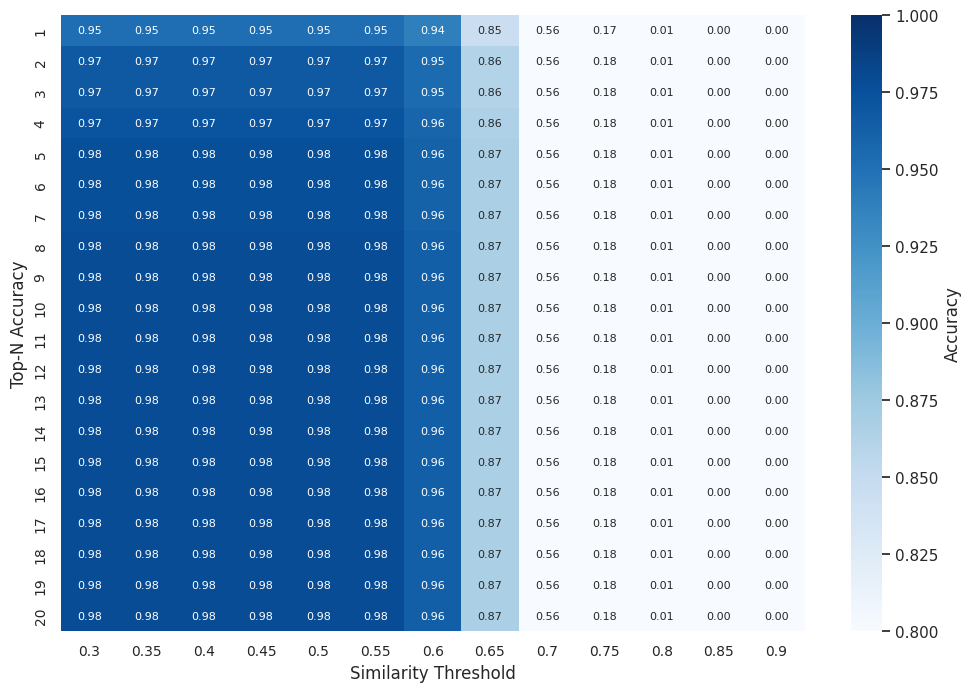

In [15]:
accuracy_df = []
for similarity_threshold in context_results_dict:
    results = context_results_dict[similarity_threshold]
    top_n_accuracy = {
        'similarity_threshold': similarity_threshold
    }
    for n in range(1, 21):
        hits = []
        for result in results:
            hits.append(result['source'] in result['retrieved_sources'][:n])
        top_n_accuracy[n] = sum(hits) / len(hits)
    accuracy_df.append(top_n_accuracy)
accuracy_df = pd.DataFrame(accuracy_df)

sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_df.set_index('similarity_threshold').T, cmap='Blues', vmin=0.8, vmax=1, annot=True,
            cbar_kws={'label': 'Accuracy'}, annot_kws={'size': 8}, fmt='.2f')
plt.xlabel('Similarity Threshold')
plt.ylabel('Top-N Accuracy')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
sns.set_theme()

In [16]:
accuracy_df[['similarity_threshold', 1, 2, 5, 10]]

,similarity_threshold,1,2,5,10
0,0.30,0.951574,0.968523,0.975787,0.978208
1,0.35,0.951574,0.968523,0.975787,0.978208
2,0.40,0.951574,0.968523,0.975787,0.978208
3,0.45,0.951574,0.968523,0.975787,0.978208
4,0.50,0.951574,0.968523,0.975787,0.978208
5,0.55,0.951574,0.968523,0.975787,0.978208
6,0.60,0.939467,0.953995,0.961259,0.963680
7,0.65,0.845036,0.861985,0.866828,0.866828
8,0.70,0.556901,0.561743,0.561743,0.561743
9,0.75,0.174334,0.176755,0.176755,0.176755


# Compare Retrieval Method (w/o reranking)

## Context

In [5]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0.55, n_similar_documents=50,
    persist_directory=None
)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:211: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device': device_type})


----------using 4*GPUs----------


In [6]:
docs = retriever.search('ยาเสพติด')

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:313: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  retrieved_documents = retriever.get_relevant_documents(query)


In [7]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.context_search(row['question'])
    sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [00:05<00:00, 69.09it/s]

Recall: 0.9782082324455206
MRR: 0.7064274938881383
Time: 0.014331244960535524 sec
Average Retrieval Size: 44.68038740920097
Top 1 accuracy: 0.6053
Top 2 accuracy: 0.7094
Top 3 accuracy: 0.7700
Top 4 accuracy: 0.8136
Top 5 accuracy: 0.8402
Top 6 accuracy: 0.8571
Top 7 accuracy: 0.8668
Top 8 accuracy: 0.8765
Top 9 accuracy: 0.8959
Top 10 accuracy: 0.9056
Top 11 accuracy: 0.9153
Top 12 accuracy: 0.9274
Top 13 accuracy: 0.9322
Top 14 accuracy: 0.9322
Top 15 accuracy: 0.9346
Top 16 accuracy: 0.9370
Top 17 accuracy: 0.9395
Top 18 accuracy: 0.9443
Top 19 accuracy: 0.9443
Top 20 accuracy: 0.9467


## Keyword

In [19]:
from rank_bm25 import BM25Okapi
from pythainlp.tokenize import word_tokenize

In [8]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    context_search=False,
    persist_directory=None
)

----------using 4*GPUs----------


In [45]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.keyword_search(row['question'])
    end = time.time()
    if len(retrieved_documents) > 0:
        documents = [document.page_content for document in retrieved_documents]
        tokenized_retrieved_documents = [word_tokenize(doc) for doc in documents]
        bm25 = BM25Okapi(tokenized_retrieved_documents)
        keywords = retriever.extract_keyword(row['question'])
        scores = bm25.get_scores(keywords)
        sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
        sorted_retrieved_documents = [retrieved_documents[i] for i in sorted_indices]
        sources = ['/'.join(doc.metadata['source'].split('/')[-2:]) for doc in sorted_retrieved_documents]
        sources = [source for source in sources if 'law' not in source]
    else:
        sources = []
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': end - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [12:25<00:00,  1.80s/it]

Recall: 0.9709443099273608
MRR: 0.7000117522076986
Time: 0.015771718637129298 sec
Average Retrieval Size: 177.8547215496368
Top 1 accuracy: 0.5787
Top 2 accuracy: 0.7312
Top 3 accuracy: 0.7942
Top 4 accuracy: 0.8329
Top 5 accuracy: 0.8499
Top 6 accuracy: 0.8644
Top 7 accuracy: 0.8765
Top 8 accuracy: 0.8862
Top 9 accuracy: 0.8959
Top 10 accuracy: 0.9080
Top 11 accuracy: 0.9201
Top 12 accuracy: 0.9249
Top 13 accuracy: 0.9274
Top 14 accuracy: 0.9298
Top 15 accuracy: 0.9322
Top 16 accuracy: 0.9419
Top 17 accuracy: 0.9419
Top 18 accuracy: 0.9419
Top 19 accuracy: 0.9419
Top 20 accuracy: 0.9419


# Compare Retrieval Method

## Keyword

In [9]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    context_search=False,
    persist_directory=None
)

----------using 4*GPUs----------


In [10]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [02:07<00:00,  3.23it/s]

Recall: 0.9709443099273608
MRR: 0.9513816826165495
Time: 0.3086318559854429 sec
Average Retrieval Size: 177.8547215496368
Top 1 accuracy: 0.9370
Top 2 accuracy: 0.9613
Top 3 accuracy: 0.9661
Top 4 accuracy: 0.9661
Top 5 accuracy: 0.9661
Top 6 accuracy: 0.9661
Top 7 accuracy: 0.9685
Top 8 accuracy: 0.9685
Top 9 accuracy: 0.9709
Top 10 accuracy: 0.9709
Top 11 accuracy: 0.9709
Top 12 accuracy: 0.9709
Top 13 accuracy: 0.9709
Top 14 accuracy: 0.9709
Top 15 accuracy: 0.9709
Top 16 accuracy: 0.9709
Top 17 accuracy: 0.9709
Top 18 accuracy: 0.9709
Top 19 accuracy: 0.9709
Top 20 accuracy: 0.9709
Top 1 accuracy: 0.9370
Top 2 accuracy: 0.9613
Top 3 accuracy: 0.9661
Top 4 accuracy: 0.9661
Top 5 accuracy: 0.9661
Top 6 accuracy: 0.9661
Top 7 accuracy: 0.9685
Top 8 accuracy: 0.9685
Top 9 accuracy: 0.9709
Top 10 accuracy: 0.9709
Top 11 accuracy: 0.9709
Top 12 accuracy: 0.9709
Top 13 accuracy: 0.9709
Top 14 accuracy: 0.9709
Top 15 accuracy: 0.9709
Top 16 accuracy: 0.9709
Top 17 accuracy: 0.9709
Top 18 a

## Context

In [7]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    persist_directory=None
)

/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:210: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device': device_type})


----------using 4*GPUs----------


In [8]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

  0%|          | 0/413 [00:00<?, ?it/s]/lustrefs/disk/home/shanwibo/Capstone-TamTanai/retrieval/../src/retrieval/retrieval.py:333: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  retrieved_documents = retriever.get_relevant_documents(query)
100%|██████████| 413/413 [01:01<00:00,  6.74it/s]

Recall: 0.9709443099273608
MRR: 0.9561138014527845
Time: 0.14751147011579094 sec
Average Retrieval Size: 36.7772397094431
Top 1 accuracy: 0.9467
Top 2 accuracy: 0.9613
Top 3 accuracy: 0.9613
Top 4 accuracy: 0.9685
Top 5 accuracy: 0.9685
Top 6 accuracy: 0.9685
Top 7 accuracy: 0.9685
Top 8 accuracy: 0.9709
Top 9 accuracy: 0.9709
Top 10 accuracy: 0.9709
Top 11 accuracy: 0.9709
Top 12 accuracy: 0.9709
Top 13 accuracy: 0.9709
Top 14 accuracy: 0.9709
Top 15 accuracy: 0.9709
Top 16 accuracy: 0.9709
Top 17 accuracy: 0.9709
Top 18 accuracy: 0.9709
Top 19 accuracy: 0.9709
Top 20 accuracy: 0.9709


## Context (Tuned K and Similarity Threshold)

In [43]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0.55, n_similar_documents=40,
    persist_directory=None
)

----------using 4*GPUs----------


In [44]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [00:49<00:00,  8.28it/s]

Recall: 0.9709443099273608
MRR: 0.9561138014527845
Time: 0.11979088656261527 sec
Average Retrieval Size: 36.355932203389834
Top 1 accuracy: 0.9467
Top 2 accuracy: 0.9613
Top 3 accuracy: 0.9613
Top 4 accuracy: 0.9685
Top 5 accuracy: 0.9685
Top 6 accuracy: 0.9685
Top 7 accuracy: 0.9685
Top 8 accuracy: 0.9709
Top 9 accuracy: 0.9709
Top 10 accuracy: 0.9709
Top 11 accuracy: 0.9709
Top 12 accuracy: 0.9709
Top 13 accuracy: 0.9709
Top 14 accuracy: 0.9709
Top 15 accuracy: 0.9709
Top 16 accuracy: 0.9709
Top 17 accuracy: 0.9709
Top 18 accuracy: 0.9709
Top 19 accuracy: 0.9709
Top 20 accuracy: 0.9709


## Context (Tuned K = 50 and Similarity Threshold = 0.55)

In [6]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    keyword_search=False, case_number=False, law_number=False, law_name=False,
    similarity_threshold=0.55, n_similar_documents=50,
    persist_directory=None
)

----------using 4*GPUs----------


In [ ]:
r = retriever.search('ยาเสพติด')

In [9]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [00:51<00:00,  7.97it/s]

Recall: 0.9782082324455206
MRR: 0.9632566585956416
Time: 0.12456298624920788 sec
Average Retrieval Size: 44.68038740920097
Top 1 accuracy: 0.9540
Top 2 accuracy: 0.9685
Top 3 accuracy: 0.9685
Top 4 accuracy: 0.9734
Top 5 accuracy: 0.9758
Top 6 accuracy: 0.9758
Top 7 accuracy: 0.9758
Top 8 accuracy: 0.9782
Top 9 accuracy: 0.9782
Top 10 accuracy: 0.9782
Top 11 accuracy: 0.9782
Top 12 accuracy: 0.9782
Top 13 accuracy: 0.9782
Top 14 accuracy: 0.9782
Top 15 accuracy: 0.9782
Top 16 accuracy: 0.9782
Top 17 accuracy: 0.9782
Top 18 accuracy: 0.9782
Top 19 accuracy: 0.9782
Top 20 accuracy: 0.9782


## Keyword + Context

In [11]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    persist_directory=None
)

----------using 4*GPUs----------


In [12]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [02:24<00:00,  2.85it/s]

Recall: 0.9975786924939467
MRR: 0.9759714055113572
Time: 0.3498244995643671 sec
Average Retrieval Size: 191.61743341404357
Top 1 accuracy: 0.9613
Top 2 accuracy: 0.9855
Top 3 accuracy: 0.9879
Top 4 accuracy: 0.9927
Top 5 accuracy: 0.9927
Top 6 accuracy: 0.9927
Top 7 accuracy: 0.9952
Top 8 accuracy: 0.9952
Top 9 accuracy: 0.9952
Top 10 accuracy: 0.9976
Top 11 accuracy: 0.9976
Top 12 accuracy: 0.9976
Top 13 accuracy: 0.9976
Top 14 accuracy: 0.9976
Top 15 accuracy: 0.9976
Top 16 accuracy: 0.9976
Top 17 accuracy: 0.9976
Top 18 accuracy: 0.9976
Top 19 accuracy: 0.9976
Top 20 accuracy: 0.9976


## Keyword + Context (Tuned K and Similarity Threshold)

In [45]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    similarity_threshold=0.55, n_similar_documents=40,
    persist_directory=None
)

----------using 4*GPUs----------


In [46]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 413/413 [01:55<00:00,  3.56it/s]

Recall: 0.9975786924939467
MRR: 0.9735500980053039
Time: 0.27950619612132666 sec
Average Retrieval Size: 191.2905569007264
Top 1 accuracy: 0.9564
Top 2 accuracy: 0.9855
Top 3 accuracy: 0.9879
Top 4 accuracy: 0.9927
Top 5 accuracy: 0.9927
Top 6 accuracy: 0.9927
Top 7 accuracy: 0.9952
Top 8 accuracy: 0.9952
Top 9 accuracy: 0.9952
Top 10 accuracy: 0.9976
Top 11 accuracy: 0.9976
Top 12 accuracy: 0.9976
Top 13 accuracy: 0.9976
Top 14 accuracy: 0.9976
Top 15 accuracy: 0.9976
Top 16 accuracy: 0.9976
Top 17 accuracy: 0.9976
Top 18 accuracy: 0.9976
Top 19 accuracy: 0.9976
Top 20 accuracy: 0.9976


## Keyword + Context (Tuned K = 50 and Similarity Threshold = 0.55)

In [8]:
retriever = Retriever(
    specific_case_path='/home/shanwibo/Capstone-TamTanai/notebooks/specific_case_knowledge.txt',
    general_source_dir='/home/shanwibo/Capstone-TamTanai/asset/documentation',
    embedding_model_path='/project/lt200301-edubot/Capstone-TamTanai/models/multilingual-e5-large',
    similarity_threshold=0.55, n_similar_documents=50,
    persist_directory=None
)

----------using 4*GPUs----------


In [11]:
r = retriever.search('ยาเสพติด')

In [9]:
results = []

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    start = time.time()
    retrieved_documents = retriever.search(row['question'], n=1000)
    sources = ['/'.join(doc['document'].metadata['source'].split('/')[-2:]) for doc in retrieved_documents]
    sources = [source for source in sources if 'law' not in source]
    results.append({
        'question': row['question'],
        'source': row['source'],
        'retrieved_sources': sources,
        'time': time.time() - start
    })

found = 0
rr_scores = []
times = []
retrieval_sizes = []
for result in results:
    found += result['source'] in result['retrieved_sources']
    rr_scores.append(RR(result['source'], result['retrieved_sources']))
    times.append(result['time'])
    retrieval_sizes.append(len(result['retrieved_sources']))
print(f'Recall: {found/len(results)}')
print(f'MRR: {np.mean(rr_scores)}')
print(f'Time: {np.mean(times)} sec')
print(f'Average Retrieval Size: {np.mean(retrieval_sizes)}')

for n in range(1, 21):
    hits = []
    for result in results:
        hits.append(result['source'] in result['retrieved_sources'][:n])
    accuracy = sum(hits) / len(hits)
    print(f'Top {n} accuracy: {accuracy:.04f}')

100%|██████████| 200/200 [00:50<00:00,  3.96it/s]

Recall: 0.97
MRR: 0.8150108225108226
Time: 0.2514252543449402 sec
Average Retrieval Size: 160.42
Top 1 accuracy: 0.7600
Top 2 accuracy: 0.8100
Top 3 accuracy: 0.8400
Top 4 accuracy: 0.8750
Top 5 accuracy: 0.8950
Top 6 accuracy: 0.9150
Top 7 accuracy: 0.9150
Top 8 accuracy: 0.9250
Top 9 accuracy: 0.9300
Top 10 accuracy: 0.9300
Top 11 accuracy: 0.9350
Top 12 accuracy: 0.9350
Top 13 accuracy: 0.9350
Top 14 accuracy: 0.9450
Top 15 accuracy: 0.9450
Top 16 accuracy: 0.9450
Top 17 accuracy: 0.9450
Top 18 accuracy: 0.9500
Top 19 accuracy: 0.9500
Top 20 accuracy: 0.9500
